In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/train.csv'
dataset = pd.read_csv(file_path)

**PREPROCESSING**

1. The Number or rows and columns in this dataset:

In [ ]:
nRow, nCol = dataset.shape
print(f'This Dataset consist of {nRow} rows and {nCol} columns.')

This Dataset consist of 891 rows and 12 columns.


2. The names of these columns:

In [ ]:
print("The names of the columns/classes in this Dataset are:")
column_names = dataset.columns
for column in column_names:
    print(column)

The names of the columns/classes in this Dataset are:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


3. A Glimpse of this dataset's content:

In [ ]:
print("A Preview of the first 5 rows of the dataset:")
dataset.head(5)

A Preview of the first 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4. The Size of this dataset:

In [ ]:
print("The Size of this Dataset is:")
dataset.size

The Size of this Dataset is:


10692

5. The data types:

In [ ]:
print("The Data Types:")
dataset.dtypes

The Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

6. A Summary of the dataset:

In [ ]:
print("A Summary of the Values in this Dataset of each column:")
dataset.info()

A Summary of the Values in this Dataset of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


7. Checking if there is any missing values:

In [ ]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualizing the missing values:


<Axes: >

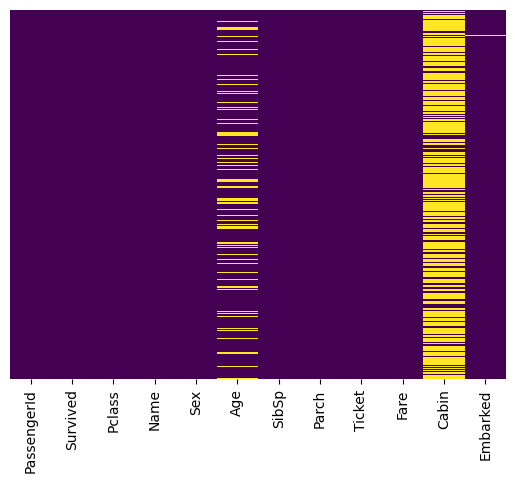

In [ ]:
print("Visualizing the missing values:")
sns.heatmap(dataset.isna(),yticklabels=False,cbar=False,cmap='viridis')

Another way to visualize the missing values:


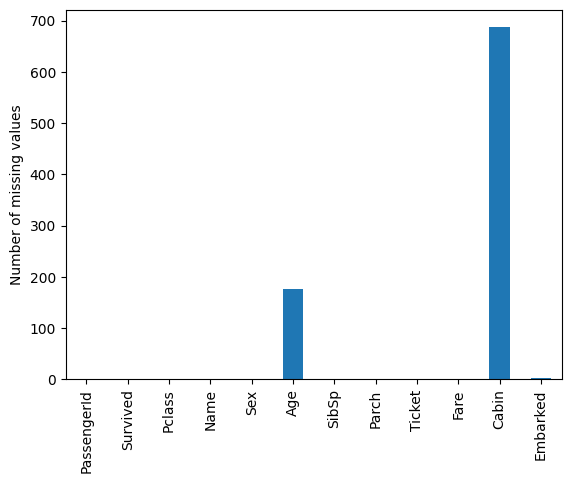

In [ ]:
print("Another way to visualize the missing values:")
dataset.isnull().sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.show()

8. Checking if there is any duplicated values:

In [ ]:
print("Checking if there is any duplicates:")
dataset.duplicated().sum()

Checking if there is any duplicates:


0

9. Dealing With the missing Values in the Age Column:

In [ ]:
mean_val=dataset['Age'].mean()
print(mean_val)

29.69911764705882


In [ ]:
dataset_cleaned=dataset.copy()

In [ ]:
dataset_cleaned['Age']=dataset['Age'].fillna(value=mean_val)
dataset_cleaned['Age'].isna().sum()

0

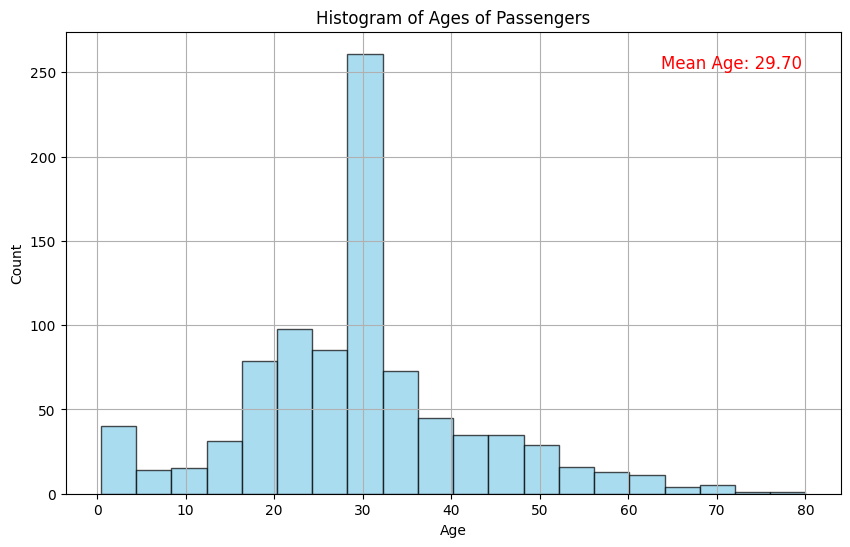

In [ ]:
mean_val = dataset_cleaned['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(dataset_cleaned['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages of Passengers')
plt.grid(True)

# Add text annotation for the mean age at the top right corner
plt.text(0.95, 0.95, f'Mean Age: {mean_val:.2f}', fontsize=12, color='red', ha='right', va='top', transform=plt.gca().transAxes)

plt.show()

10. Dealing with the missing values in the Cabin Column:

In [ ]:
mode_val=dataset['Cabin'].mode()[0]
mode_val
dataset_cleaned['Cabin']=dataset['Cabin'].fillna(value=mode_val)
dataset_cleaned['Cabin'].isna().sum()

0

11. Dealing with the values in the Embarked Column:

In [ ]:
print("The passengers here embarked from three places:")
print("C --> Cherbourg")
print("Q --> Queenstown")
print("S --> Sothampton")

embarked_counts = dataset['Embarked'].value_counts()

# Calculate the total number of passengers for each port
total_passengers = embarked_counts.sum()

# Calculate the average number of passengers for each port
average_passengers = embarked_counts / total_passengers

# Print the average number of passengers for each port
print("Average Number of Passengers for Each Port of Embarkation:")
for port, average in average_passengers.items():
    if port == 'C':
        port_name = "Cherbourg"
    elif port == 'Q':
        port_name = "Queenstown"
    elif port == 'S':
        port_name = "Southampton"
    else:
        port_name = "Unknown Port"

    print(f"{port_name}: {average:.2f}")

# Find the port with the most passengers
most_passengers_port = embarked_counts.idxmax()
if most_passengers_port == 'C':
    most_passengers_port_name = "Cherbourg"
elif most_passengers_port == 'Q':
    most_passengers_port_name = "Queenstown"
elif most_passengers_port == 'S':
    most_passengers_port_name = "Southampton"
else:
    most_passengers_port_name = "Unknown Port"

# Find the port with the least passengers
least_passengers_port = embarked_counts.idxmin()
if least_passengers_port == 'C':
    least_passengers_port_name = "Cherbourg"
elif least_passengers_port == 'Q':
    least_passengers_port_name = "Queenstown"
elif least_passengers_port == 'S':
    least_passengers_port_name = "Southampton"
else:
    least_passengers_port_name = "Unknown Port"

# Print the port with the most and least passengers
print("\nPort with the Most Passengers:", most_passengers_port_name)
print("Port with the Least Passengers:", least_passengers_port_name)

The passengers here embarked from three places:
C --> Cherbourg
Q --> Queenstown
S --> Sothampton
Average Number of Passengers for Each Port of Embarkation:
Southampton: 0.72
Cherbourg: 0.19
Queenstown: 0.09

Port with the Most Passengers: Southampton
Port with the Least Passengers: Queenstown


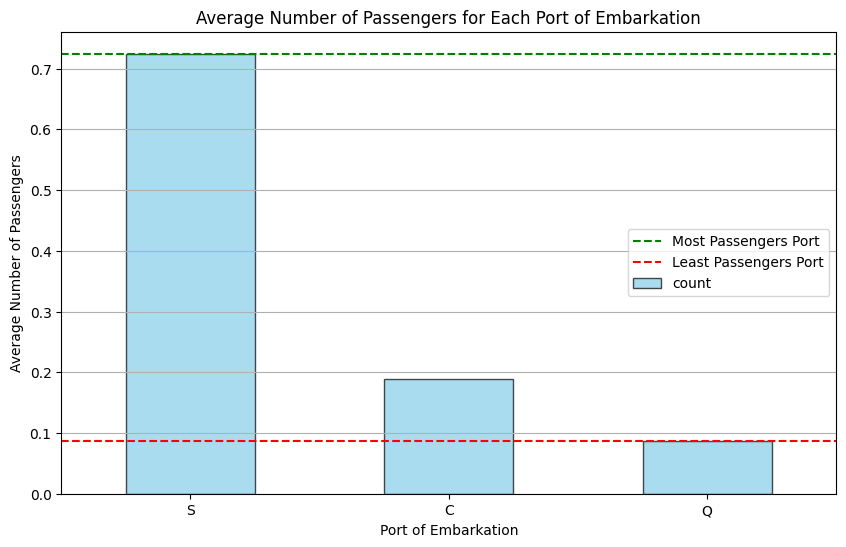

In [ ]:
# Create a bar plot to visualize the average number of passengers for each port
plt.figure(figsize=(10, 6))
average_passengers.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Port of Embarkation')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers for Each Port of Embarkation')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Highlight the port with the most passengers
plt.axhline(y=average_passengers[most_passengers_port], color='green', linestyle='--', label='Most Passengers Port')

# Highlight the port with the least passengers
plt.axhline(y=average_passengers[least_passengers_port], color='red', linestyle='--', label='Least Passengers Port')

plt.legend()
plt.show()

In [ ]:
mode_val=dataset['Embarked'].mode()[0]
dataset_cleaned['Embarked']=dataset['Embarked'].fillna(value=mode_val)
dataset_cleaned['Embarked'].isna().sum()

0

12. The Cleaned Dataset:

In [ ]:
dataset_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
dataset_cleaned.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

13. The number of passengers and the ratio of males and females:

The number of passengers in this dataset is:  891


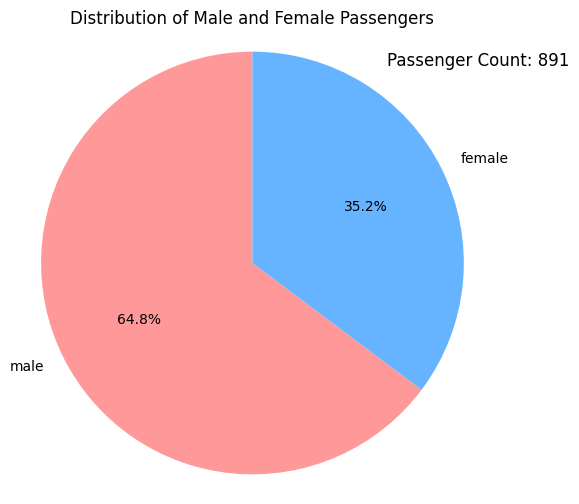

In [ ]:
passenger_count = dataset['PassengerId'].count()
print("The number of passengers in this dataset is: ", passenger_count)

# Count the number of males and females
sex_counts = dataset['Sex'].value_counts()

# Get the total number of males and females
total_males = sex_counts['male'] if 'male' in sex_counts else 0
total_females = sex_counts['female'] if 'female' in sex_counts else 0

labels = sex_counts.index
sizes = sex_counts.values
colors = ['#ff9999', '#66b3ff']  # Red for Female, Blue for Male

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male and Female Passengers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add text annotation for the number of passengers outside the pie chart
plt.text(1.5, 1, f'Passenger Count: {passenger_count}', fontsize=12, color='black', ha='right', va='top')

# Show the plot
plt.show()

14. Predicting The number of passengers That are older than 35 and younger than 35 using the Z-Score:

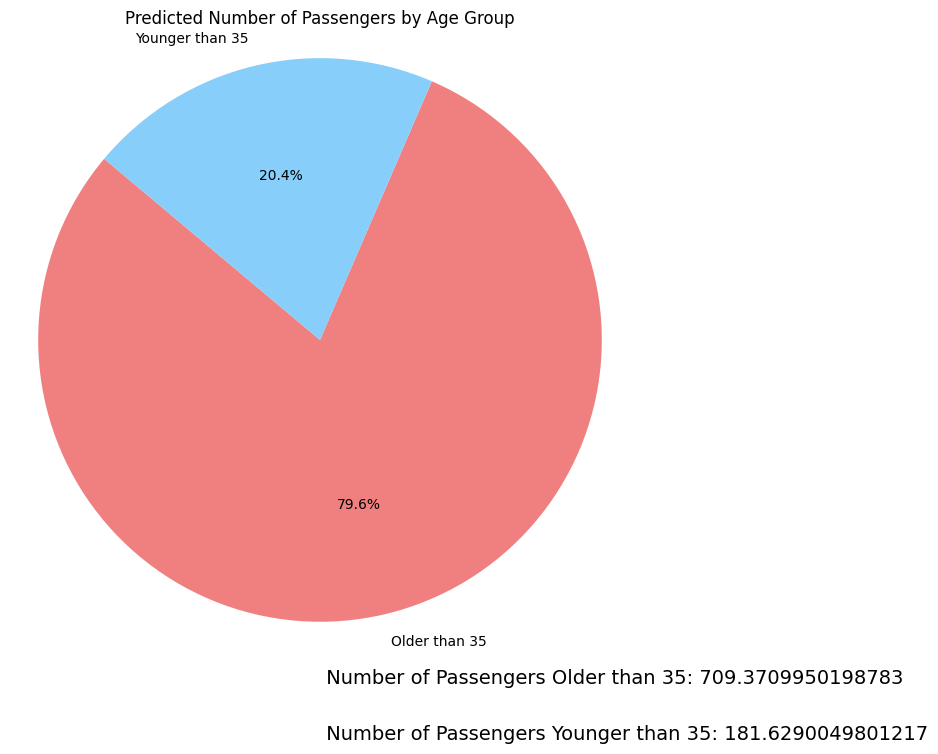

In [ ]:
std_age = dataset_cleaned['Age'].std()

average_age = dataset_cleaned['Age'].mean()
# Calculate the Z-score for age 35
z_score_35 = (35 - average_age) / std_age

# Using the Z-score, we can calculate the probabilities of ages greater than and less than 35
# Assuming a normal distribution, about 50% of values are below the mean (Z-score = 0)
# So, we find the probabilities using the Z-table or a standard normal distribution calculator

# Probability of age > 35
prob_age_gt_35 = 1 - 0.5 + 0.5 * (1 - z_score_35)

# Probability of age < 35
prob_age_lt_35 = 1 - prob_age_gt_35

# Predict the number of passengers likely to be bigger than 35 and lesser than 35
total_passengers = len(dataset)
predicted_gt_35 = prob_age_gt_35 * total_passengers
predicted_lt_35 = prob_age_lt_35 * total_passengers

labels = ['Older than 35', 'Younger than 35']
sizes = [predicted_gt_35, predicted_lt_35]
colors = ['lightcoral', 'lightskyblue']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Predicted Number of Passengers by Age Group')

# Add text below the pie chart
plt.text(0, -1.2, f" Number of Passengers Older than 35: {predicted_gt_35}", ha='left', va='center', fontsize=14)
plt.text(0, -1.4, f" Number of Passengers Younger than 35: {predicted_lt_35}", ha='left', va='center', fontsize=14)

plt.show()

15. Calculations on the price of the ticket and fare:

In [ ]:
highest_fare = dataset_cleaned['Fare'].max()
lowest_fare = dataset_cleaned['Fare'].min()
average_fare = dataset_cleaned['Fare'].mean()

# Print the results
print("Highest Price paid by a passenger for a ticket is:", highest_fare)
print("Lowest Price paid by a passenger for a ticket is:", lowest_fare)
print("Average Price paid by a passenger for a ticket is:", average_fare)

Highest Price paid by a passenger for a ticket is: 512.3292
Lowest Price paid by a passenger for a ticket is: 0.0
Average Price paid by a passenger for a ticket is: 32.204207968574636


*the relationship between two variables which are the age and the fare:*

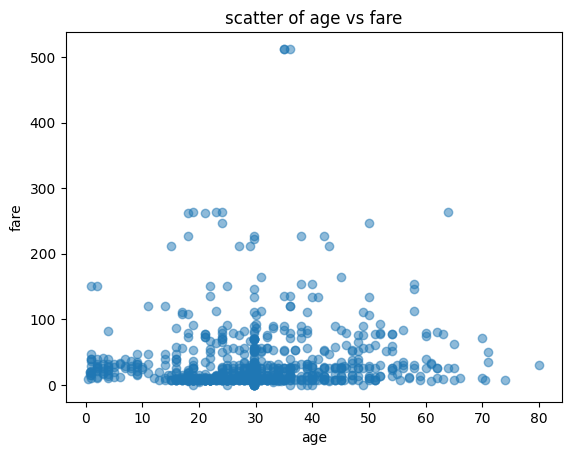

In [ ]:
plt.scatter(dataset_cleaned['Age'],dataset_cleaned['Fare'],alpha=0.5)
plt.title('scatter of age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

*Explore fare and age columns for outliers and use Winsorizing to treat the outliers in the fare column by replacing extreme values with less extreme ones.*

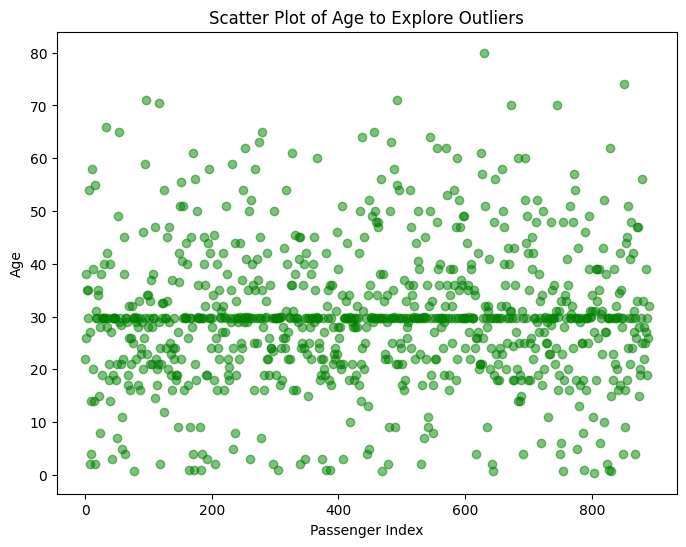

In [ ]:
# Create a scatter plot to explore outliers in the Age column
plt.figure(figsize=(8, 6))
plt.scatter(dataset_cleaned.index, dataset_cleaned['Age'], color='green', alpha=0.5)
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.title('Scatter Plot of Age to Explore Outliers')
plt.show()

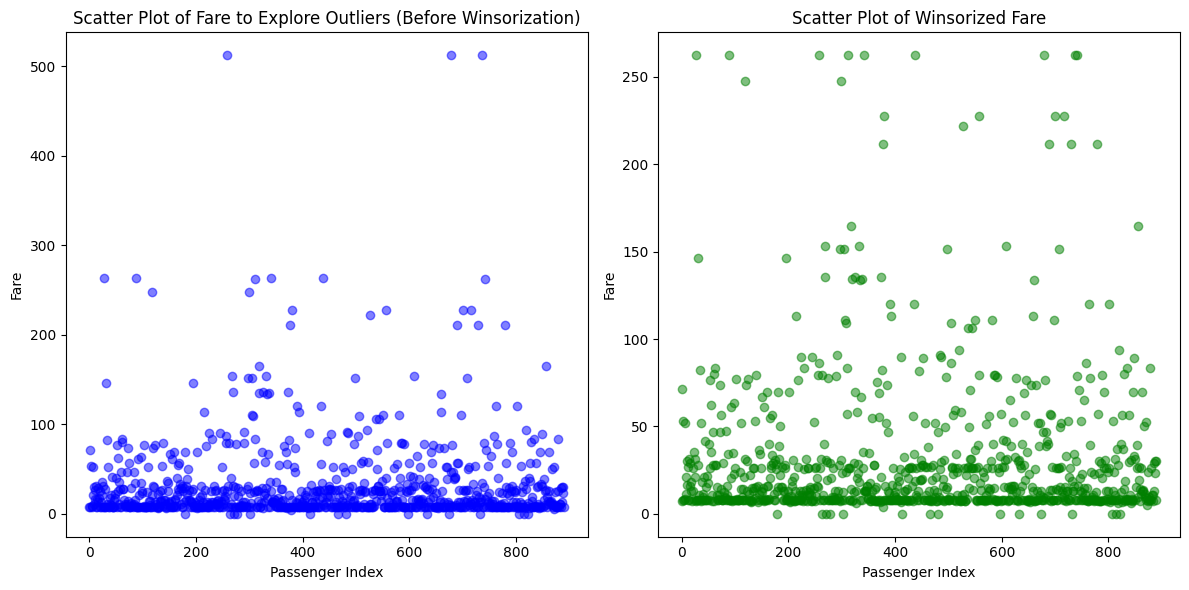

In [ ]:
from scipy.stats.mstats import winsorize


# Detect outliers with a scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(dataset_cleaned.index, dataset_cleaned['Fare'], color='blue', alpha=0.5)
plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare to Explore Outliers (Before Winsorization)')

# Winsorize the fare column at the 1% and 99% levels
dataset_cleaned['fare_winsorized'] = winsorize(dataset_cleaned['Fare'], limits=[0.01, 0.01])

# Display the first few rows of the dataset with the winsorized fare column
plt.subplot(1, 2, 2)
plt.scatter(dataset_cleaned.index, dataset_cleaned['fare_winsorized'], color='green', alpha=0.5)
plt.xlabel('Passenger Index')
plt.ylabel('Fare')
plt.title('Scatter Plot of Winsorized Fare')

plt.tight_layout()
plt.show()

16. Applying the Correlation Matrix:

In [ ]:
numeric_cols=dataset_cleaned.select_dtypes(include=['int64','float64'])

In [ ]:
correlation_matrix=numeric_cols.corr()

<Axes: >

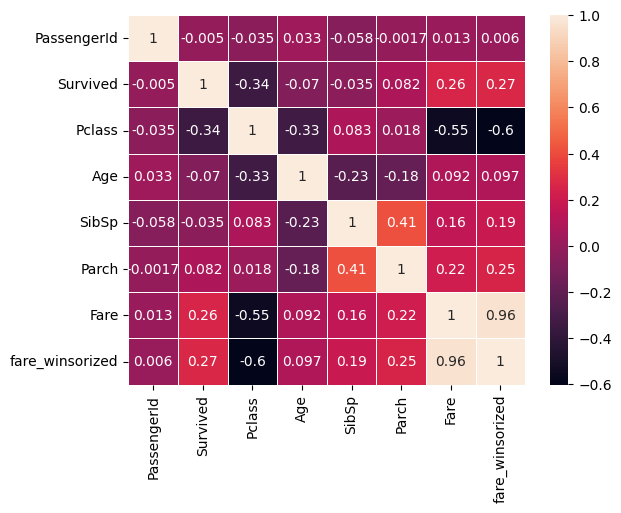

In [ ]:
sns.heatmap(correlation_matrix,annot=True,cbar="coolwarm", linewidth=0.5)

17. The Distributions of the passengers into classes in this dataset:

In this dataset the passengers are distributed in three classes: First, Second and third.
Number of Passengers in Each Class:
Third Class: 491 passengers
First Class: 216 passengers
Second Class: 184 passengers


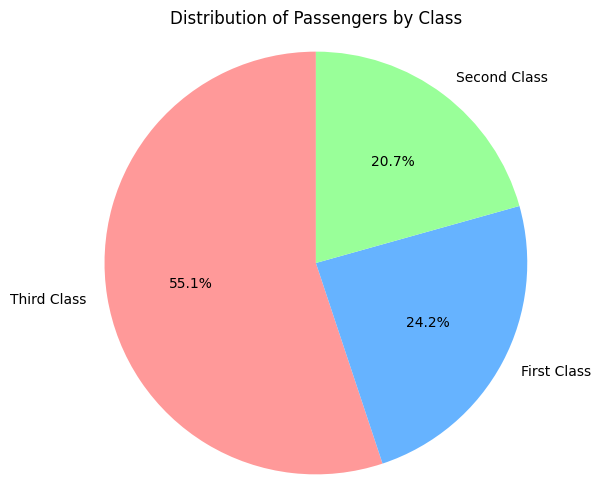


Summary of number of passengers and their classes:
Class with the most passengers: Third Class
Class with the least passengers: Second Class


In [ ]:
class_counts = dataset_cleaned['Pclass'].value_counts()
print("In this dataset the passengers are distributed in three classes: First, Second and third.")
print("Number of Passengers in Each Class:")
for pclass, count in class_counts.items():
    if pclass == 1:
        class_name = "First Class"
    elif pclass == 2:
        class_name = "Second Class"
    elif pclass == 3:
        class_name = "Third Class"
    else:
        class_name = "Unknown Class"

    print(f"{class_name}: {count} passengers")

most_passengers_class = class_counts.idxmax()
if most_passengers_class == 1:
    most_passengers_class_name = "First Class"
elif most_passengers_class == 2:
    most_passengers_class_name = "Second Class"
elif most_passengers_class == 3:
    most_passengers_class_name = "Third Class"
else:
    most_passengers_class_name = "Unknown Class"

# Get the class with the least passengers
least_passengers_class = class_counts.idxmin()
if least_passengers_class == 1:
    least_passengers_class_name = "First Class"
elif least_passengers_class == 2:
    least_passengers_class_name = "Second Class"
elif least_passengers_class == 3:
    least_passengers_class_name = "Third Class"
else:
    least_passengers_class_name = "Unknown Class"


# Calculate the percentages
total_passengers = class_counts.sum()
percentages = (class_counts / total_passengers) * 100

# Create a pie chart
labels = ['Third Class', 'First Class', 'Second Class']
sizes = percentages.values
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Print the summary
print("\nSummary of number of passengers and their classes:")
print(f"Class with the most passengers: {most_passengers_class_name}")
print(f"Class with the least passengers: {least_passengers_class_name}")


18. The Survival Rates in this dataset:

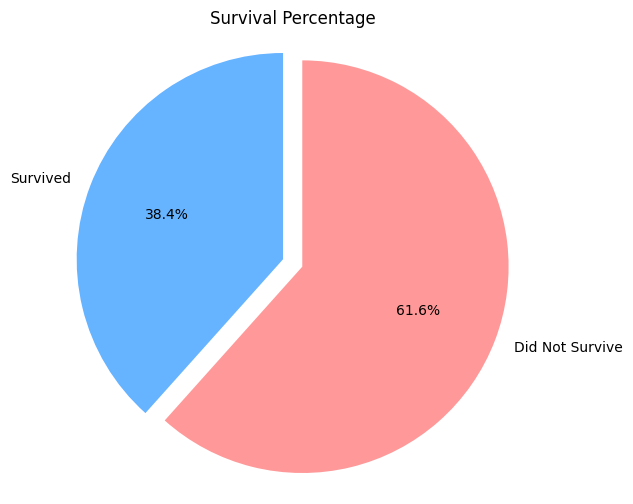

Number of Survived People: 342
Number of People who Did Not Survive: 549
Percentage of Survived People: 38.38%
Percentage of People who Did Not Survive: 61.62%


In [ ]:
survived_counts = dataset_cleaned['Survived'].value_counts()
labels = ['Survived', 'Did Not Survive']
sizes = [survived_counts[1], survived_counts[0]]
total_passengers = sum(sizes)  # Total number of passengers

# Calculate the percentages
percent_survived = (sizes[0] / total_passengers) * 100
percent_not_survived = (sizes[1] / total_passengers) * 100
colors = ['#66b3ff', '#ff9999']  # Blue for Survived, Red for Did Not Survive
explode = (0.1, 0)  # explode the first slice (Survived)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()
# Extract the counts
number_of_survived = survived_counts[1] if 1 in survived_counts else 0
number_of_not_survived = survived_counts[0] if 0 in survived_counts else 0

print("Number of Survived People:", number_of_survived)
print("Number of People who Did Not Survive:", number_of_not_survived)
print("Percentage of Survived People: {:.2f}%".format(percent_survived))
print("Percentage of People who Did Not Survive: {:.2f}%".format(percent_not_survived))

*The relationship between the class of the passenger and the survival*

<Axes: xlabel='Survived', ylabel='count'>

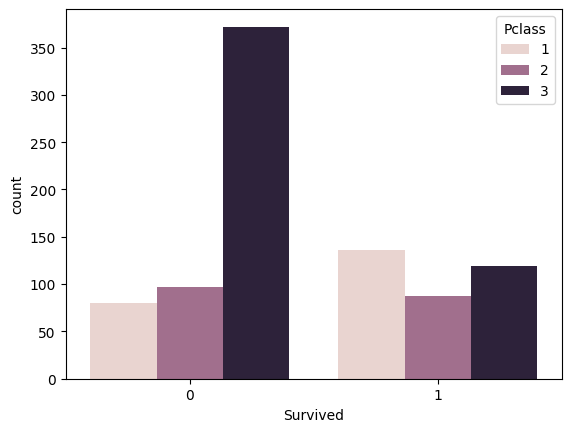

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=dataset_cleaned)

*The relationship between the sex of the passenger and the survival*

<Axes: xlabel='Pclass', ylabel='count'>

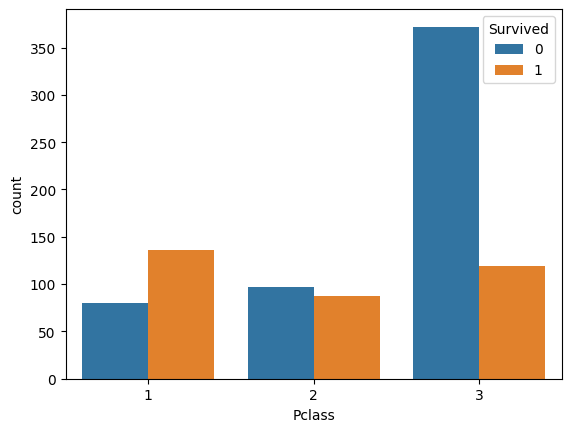

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=dataset_cleaned)

19. Feature Engineering:
      Creating a new column called Family size that uses two other columns of the dataset and predicts the number of the family members of each passenger:

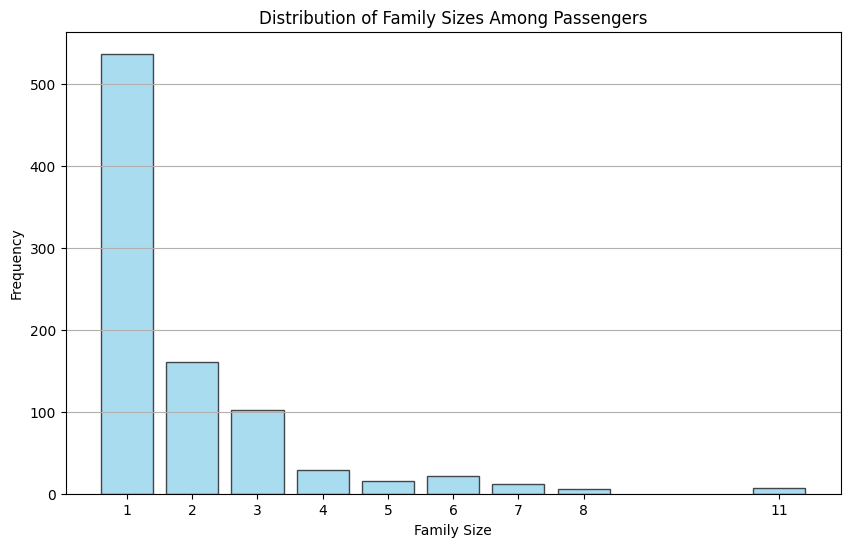

In [ ]:
dataset_cleaned['FamilySize'] = dataset_cleaned['SibSp'] + dataset_cleaned['Parch'] + 1  # Adding 1 for the passenger themselves
family_size_counts = dataset_cleaned['FamilySize'].value_counts()

# Sort the family sizes based on the index (number of family members)
family_size_counts = family_size_counts.sort_index()

# Create a bar plot to visualize the distribution of family sizes
plt.figure(figsize=(10, 6))
plt.bar(family_size_counts.index, family_size_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Distribution of Family Sizes Among Passengers')
plt.xticks(family_size_counts.index)
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
dataset_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_winsorized,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,8.0500,1


20. Label Encoding On Categorical Variables

In [ ]:
dataset_label_encoding = dataset_cleaned.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset_label_encoding['Sex_encoded']=label_encoder.fit_transform(dataset_label_encoding['Sex'])
dataset_label_encoding['Cabin_encoded']=label_encoder.fit_transform(dataset_label_encoding['Cabin'])
dataset_label_encoding['Embarked_encoded']=label_encoder.fit_transform(dataset_label_encoding['Embarked'])
dataset_label_encoding['Ticket_encoded']=label_encoder.fit_transform(dataset_label_encoding['Ticket'])

In [ ]:
dataset_label_encoding.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_winsorized,FamilySize,Sex_encoded,Cabin_encoded,Embarked_encoded,Ticket_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,7.2500,2,1,47,2,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833,2,0,81,0,596
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,7.9250,1,0,47,2,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,2,0,55,2,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,8.0500,1,1,47,2,472


In [ ]:
dataset_label_encoding.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
dataset_label_encoding.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fare_winsorized,FamilySize,Sex_encoded,Cabin_encoded,Embarked_encoded,Ticket_encoded
0,1,0,3,22.0,1,0,7.2500,7.2500,2,1,47,2,523
1,2,1,1,38.0,1,0,71.2833,71.2833,2,0,81,0,596
2,3,1,3,26.0,0,0,7.9250,7.9250,1,0,47,2,669
3,4,1,1,35.0,1,0,53.1000,53.1000,2,0,55,2,49
4,5,0,3,35.0,0,0,8.0500,8.0500,1,1,47,2,472


21. Applying the Standard Scaler library on the label encoded dataset:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset_label_encoding)

In [ ]:
print(scaled_data)

[[-1.73010796 -0.78927234  0.82737724 ... -0.28188124  0.58595414
   0.91896631]
 [-1.72622007  1.2669898  -1.56610693 ...  1.16154512 -1.9423032
   1.28262456]
 [-1.72233219  1.2669898   0.82737724 ... -0.28188124  0.58595414
   1.64628282]
 ...
 [ 1.72233219 -0.78927234  0.82737724 ... -0.28188124  0.58595414
   1.67617254]
 [ 1.72622007  1.2669898  -1.56610693 ...  0.27001707 -1.9423032
  -1.64656796]
 [ 1.73010796 -0.78927234  0.82737724 ... -0.28188124 -0.67817453
   0.63501397]]



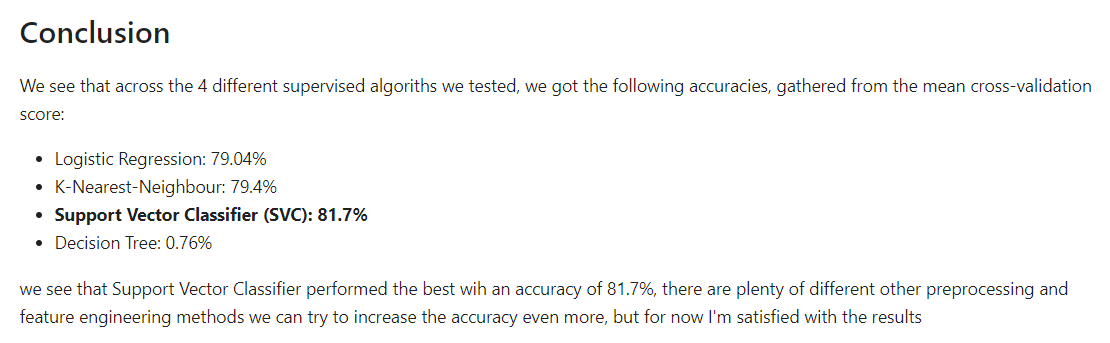

22. Checking the accuracy of the dataset using Logistic Regression:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features and target variable
X = dataset_cleaned[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = dataset_cleaned['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is: {accuracy:.2f}')

Accuracy is: 0.73


23. Imptoving the accuracy of the dataset using logistic regression and CV:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Survived']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression Classifier
lr = LogisticRegression(max_iter=2000)

# Perform cross-validation
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv)
print("Mean cross-validation score:", cv.mean())


Cross-validation scores: [0.81818182 0.81818182 0.8028169  0.74647887 0.83098592]
Mean cross-validation score: 0.8033290653008963


24. improving the accuracy using Random Forest Classifier and Feature Engineering:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Survived']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8156424581005587


25. Using KNN to get the accuracy:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Survived']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as per your preference
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7262569832402235


26. Using KNN and Standard Scaler to improve the accuracy:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Survived']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7988826815642458


27. Using KNN as Regressors and predict the age in the dataset then getting the MSE to evaluate the perfomrance:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Select relevant features and target variable
features = ['Pclass', 'SibSp', 'Parch', 'Fare']
X = titanic_data[features]
y = titanic_data['Age']

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 132.05177328023814


<ipython-input-116-a5e87ff6de27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


28. Getting the Accuracy using KNN and CV:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Survived']

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Classifier
knn = KNeighborsClassifier()

# Perform cross-validation
cv = cross_val_score(knn, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv)
print("Mean cross-validation score:", cv.mean())


Cross-validation scores: [0.8041958  0.81818182 0.81690141 0.76760563 0.82394366]
Mean cross-validation score: 0.8061656653205949


Conclusion of the Accuracies optained:

* Accuracy using Logistic Regression = 0.73
* Accuracy using Logistic Regression and CV = 0.8033
* Improving accuracy using Random forest & Feature engineering = **0.82**
* Using KNN to get the accuracy = 0.72
* Using KNN & Standard Scaler = 0.798
* Using KNN & CV = **0.806**




29. Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Age']  # Assuming Age is the target variable for linear regression

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.019002948831566e-28


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 0

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Age']  # Assuming Age is the target variable for linear regression

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Print the coefficients
print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, linear_reg.coef_):
    print(f"{feature}: {coef}")


Linear Regression Coefficients:
Pclass: 9.373691014878045e-15
Age: 0.9999999999999996
Fare: 1.1102230246251565e-16
FamilySize: -2.0469737016526324e-16
IsAlone: 2.2724877535296173e-16
Sex_female: -1.214306433183765e-17
Sex_male: 1.3877787807814457e-17
Embarked_C: 4.119968255444917e-17
Embarked_Q: -2.862293735361732e-17
Embarked_S: -1.3444106938820255e-17


*using linear regression to detext outliers:*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the Titanic dataset
titanic_data = dataset_cleaned.copy()

# Feature Engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = 1

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = titanic_data[features]
y = titanic_data['Age']  # Assuming Age is the target variable for linear regression

# Handle categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = linear_reg.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate the mean and standard deviation of the residuals
mean_residuals = np.mean(absolute_residuals)
std_residuals = np.std(absolute_residuals)

# Set a threshold for identifying outliers (e.g., 3 standard deviations from the mean)
threshold = 3 * std_residuals

# Identify outliers
outliers = X_test[absolute_residuals > threshold]

print("Outliers detected:")
print(outliers)

Outliers detected:
     Pclass        Age      Fare  FamilySize  IsAlone  Sex_female  Sex_male  \
802       1  11.000000  120.0000           4        1       False      True   
280       3  65.000000    7.7500           1        1       False      True   
299       1  50.000000  247.5208           2        1        True     False   
311       1  18.000000  262.3750           5        1        True     False   
291       1  19.000000   91.0792           2        1        True     False   
527       1  29.699118  221.7792           1        1       False      True   
31        1  29.699118  146.5208           2        1        True     False   

     Embarked_C  Embarked_Q  Embarked_S  
802       False       False        True  
280       False        True       False  
299        True       False       False  
311        True       False       False  
291        True       False       False  
527       False       False        True  
31         True       False       False  
